In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mfprado', api_key='kzf5Lu7pbSrt3bYnlXLs')

import numpy as np

from math import log, sqrt, exp, pi
from scipy import stats as st
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(11,8)})


import warnings
warnings.filterwarnings("ignore")
#Si no tienen la libreria plotly -> https://plot.ly/python/getting-started/
#Si no tienen la libreria seaborn http://seaborn.pydata.org/installing.html

# Trabajo Prático 1

#### Ejercicio 1
Utilizando Matlab, Octave o Python implementar un Generador Congruencial Lineal (GCL) de módulo 
$2^{32}$ , multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.
* Informar los primeros 6 números al azar de la secuencia.
* Modificar el GCL para que devuelva números al azar entre 0 y 1, y realizar un histograma sobre 100.000
valores generados.

In [12]:
m = 2**32 
a = 1013904223
c = 1664525
seed = int((94335 + 93784 + 96626)/3)

# Método Lineal Congruente [Lehmer, 1949]
#U(n) = (a*U(n-1) + c) mod m

Un = {}
Un[0] = seed

def U(n):
    if (n in Un) :
        return Un[n]
    else:
        Un[n] = (a*U(n-1) + c) % m
        return Un[n]

# Primeros 6 Números Aleatorios
for i in range(1,7):
    print(U(i))

1683756394
2988766819
1144704458
3893264899
1949204010
1294472611


In [13]:
#100.000 valores random generados entre 0 y 1
randomNums = list()
for i in range(0,100000):
    x = U(i+1)
    randomNums.insert(i,x/m)

data = [go.Histogram(x=randomNums)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

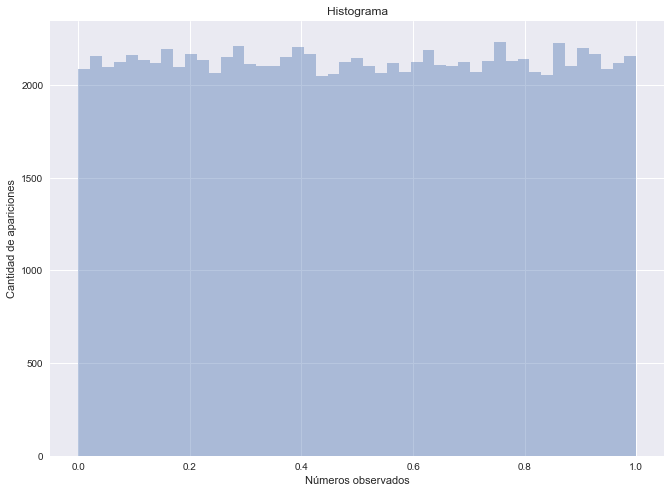

In [9]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')

sns.distplot(randomNums,  kde=False)
sns.set(style="white", context="talk")

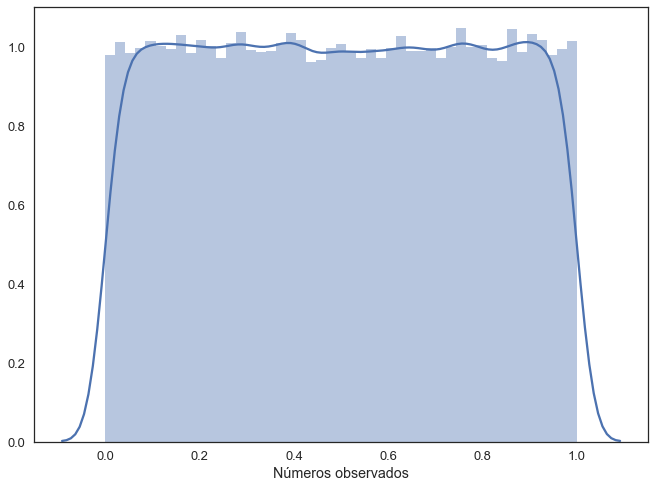

In [10]:
plt.xlabel('Números observados')

sns.distplot(randomNums)
sns.set(style="white", context="talk")

#### Ejercicio 2
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y utilizando el método de la transformada inversa genere números pseudoaleatorios con distribución exponencial negativa de media 15.
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

In [14]:
alfa = 1/15
numsExp = list()
exp = 0
n = 100000 #Cantidad de muestras

for i in range(0,n):
    exp = (log(1-(randomNums[i]))/alfa)*(-1)
    numsExp.insert(i,exp)

unique, counts = np.unique(numsExp, return_counts=True)

print('Varianza = ' + str(np.var(numsExp)))
print('Media = ' + str(np.median(numsExp)))
print('Moda = ' + str(st.mode(numsExp)[0][0]))

Varianza = 225.9273005825936
Media = 10.379580021900171
Moda = 8.081553818275827e-06


In [15]:
data = [go.Histogram(x=numsExp)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')


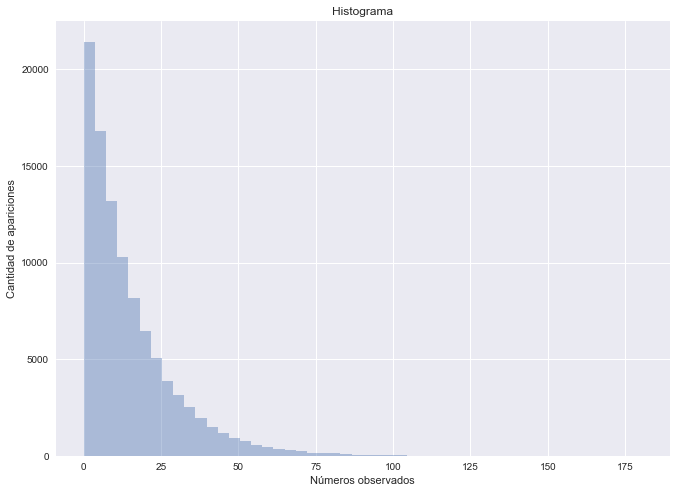

In [23]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')


sns.distplot(numsExp, kde=False)
sns.set(style="white", context="talk")

La distribución exponencial es una distribución de probabilidad continua con un parámetro 
$λ>0$
 cuya función de densidad es:
$f(x)= P(x)=\left\{\begin{matrix}
  \lambda e^{-\lambda x} & \quad \text{para } x \ge 0 \\
  0 & \quad \text{en caso contrario}
  \end{matrix}\right.$
  
Y su función de distribución acumulada es:

$  F(x)= P(X \le x)=\left\{\begin{matrix}
  0 & \text{para }x < 0 \\
  1-e^{-\lambda x} & \text{para }x \ge 0
  \end{matrix}\right.$
  
La media se puede calcular como:
  
 $E[X]=\frac{1}{\lambda}$
 
y la varianza como:
 
$ V[X]=\frac{1}{\lambda^2}$

en cuanto la moda para una distribución exponencial siempre es 0.
  
 Para el caso que estamos estudiando: 
 
 $λ = 1/15$
 
 Por lo que teóricamente 
 
 $E[X] = 15,\qquad V[X] = 225$
 
 La media,varianza y moda obtenidas fueron:
 
 $E[X] = 10.379580021900171,\qquad V[X] = 225.9273005825936,\qquad Moda = 8.081553818275827e-06$


#### Ejercicio 3
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 genere números pseudoaleatorios con distribución Normal Standard utilizando el método de la transformada inversa (realizando un muestreo de función de distribución acumulada e interpolándolos linealmente).
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.


#### Ejercicio 4
Genere 100.000 números aleatorios con distribución Normal de media 35 y desvío estándar 5 utilizando el algoritmo de Aceptación y Rechazo.
* Realizar un histograma con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab u Octave.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

In [60]:
c = sqrt((2*exp(1)/pi))

#N MUESTRAS EXPONENCIALES DE MEDIA 1
n = 100000
numsExp = list()
probabilidadDeAceptar = list()
numsGauss = list() #VALORES ACEPTADOS COMO GAUSSIANOS

#NORMAL DE MEDIA 35 Y VARIANZA 25
def normal(x):
    return ((exp(-0.5*(((x-35)/5)**2)))/sqrt(50*pi))

#PROBABILIDAD DE ACPTAR EL VALOR GENERADO
def prob(x):
    return (normal(x)/(c*exp(-x)))

#MUESTRAS DE EXPONENCIALES DE MEDIA 1 Y SE GENERA UN VECTOR DE PROBABILIDADES
#DE ACEPTAR CADA VALOR GENERADO
for i in range(0,n):
    t = np.random.exponential(1)
    numsExp.insert(i, t)
    probabilidadDeAceptar.insert(i,prob(t))

for i in range(0,n):
    r = np.random.uniform()

    if r > probabilidadDeAceptar[i]:
        r2 = np.random.uniform()
        if r2 < 0.5:
            numsGauss.insert(i,numsExp[i])
        else:
            numsGauss.insert(i,numsExp[i]*(-1))

print('Porcentaje de rechazo = ' + str((n-len(numsGauss))/n))

print('Varianza = ' + str(np.var(numsGauss)))
print('Media = ' + str(np.median(numsGauss)))
print('Moda = ' + str(st.mode(numsGauss)[0][0]))

TypeError: 'float' object is not callable

In [62]:
data = [go.Histogram(x=numsGauss)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

NameError: name 'numsGauss' is not defined

#### Ejercicio 5
Utilizando el método de la transformada inversa y utilizando el generador de números aleatorios implementado en el ejercicio 1 genere números aleatorios siguiendo la siguiente función de distribución de probabilidad empírica.

| Probabilidad | Valor generado |
| --- | --- |
| 0.5 | 1 |
| 0.2 | 2 |
| 0.1 | 3 |
| 0.2 | 4 |


#### Ejercicio 6
Considerar el siguiente experimento:
Lanzar una moneda tantas veces como sea necesario hasta obtener cara.
Realizar el experimento 10000 veces indicando:
* ¿A qué tipo de proceso corresponde cada uno de los lanzamientos?
* Con qué distribución conocida se puede modelar cada uno de los experimentos.
* Realizar un histograma mostrando la distribución obtenida

In [63]:
nums = list()
for i in range(0,10000):
    nums.insert(i,np.random.geometric(0.5))

In [64]:
data = [go.Histogram(x=nums)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

Cada uno de los lanzamientos corresponde al tipo de proceso ...

Cada uno de los experimentos se pueden modelar con una distribución ...

#### Ejercicio 7
Realizar, sólo gráficamente, un test espectral en 2 y 3 dimensiones al generador conguencial lineal implementado en el ejercicio 1. ¿Cómo se distribuyen espacialmente los puntos obtenidos?

#### Ejercicio 8
Realizar un test Chi 2 a la distribución empírica implementada en el Ej 6. Analizar el resultado para un nivel de significación 0,01.

In [66]:
nums = list()
n = 10000

for i in range(0,n):
    nums.insert(i,np.random.geometric(0.5))


d2 = 0

valores, ocurrencias = np.unique(nums, return_counts=True)

print('Moda = ' + str(st.mode(nums)[0][0]))

k = len(valores) #CANTIDAD DE VALORES DIFERENTES 
pi = 1/k #PROBABILIDAD ESPERADA

for i in range(0,k):
    d2 += ((ocurrencias[i] - n*(pi))**2)/(n*(pi))

print('Valores obtenidos: ' + str(valores))
print('Cantidad de valores obtenidos diferentes: ' + str(k))
print('D2 = ' + str(d2))

Moda = 1
Valores obtenidos: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15]
Cantidad de valores obtenidos diferentes: 14
D2 = 36371.2032


In [65]:
data = [go.Histogram(x=nums)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

Primero medimos la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 


**Pearson** (1900) demostró que $D^{2}$ responde a una distribución de tipo $Chi^{2}$, por lo tanto, encontramos $\textbf{t}$ tal que  $P(D^{2} > t) = \alpha$  y aceptamos la hipótesis siempre que $D^{2} < t$.

Encontramos que nuestro $D^{2} = $ {{d2}} .

Con un nivel de significancia de $1\%$, $\alpha = 0.01$, y una cantidad de diferentes valores igual a 17, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.01$ y grados de libertad  $v = k-1 = 16 $,  tenemos  $t = 32.0$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $1\%$.

#### Ejercicio 9
Al generador congruencial lineal implementado en el ejercicio 1 realizarle un gap test para los siguientes intervalos:

| Intervalo 1 | Intervalo 2  |
|--|
| 0.2 - 0.6 | 0.5 - 1|

Analizar los resultados con un nivel de significación del 5%.

#### Ejercicio 10
Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 4, y analizar el resultado del mismo para un nivel de significación 0,01.

Graficar la distribución acumulada real versus la distribución empírica.

In [50]:
nums = list()
for i in range(0,100000):
    nums.insert(i,np.random.geometric(0.5))

    
data = [go.Histogram(x=nums)]
layout = go.Layout(
    title='Distribución de los numeros aleatorios obtenidos',
    xaxis=dict(
        title='Numeros obtenidos'
    ),
    yaxis=dict(
        title='Cantidad de apariciones'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')